Image Processing 3

Student Info :

1400391  باسم حسام الدين بشير عباس     
BN:43752    
Mail:bassemhossam96@gmail.com

Imports and helper fnc

In [115]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as matplotimg
import numpy as np
from math import pi
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

def show_results(image1,image2,image3):
    res_plot=plt.figure(figsize=(15,15))
    im1=res_plot.add_subplot(1,3,1)
    im1.set_title('Original image')
    im1.imshow(cv2.cvtColor(image1,cv2.COLOR_BGR2RGB))
    im2=res_plot.add_subplot(1,3,2)
    im2.set_title('My hough transform ')
    im2.imshow(cv2.cvtColor(image2,cv2.COLOR_BGR2RGB))
    im3=res_plot.add_subplot(1,3,3)
    im3.set_title('Cv2 hough transform ')
    im3.imshow(cv2.cvtColor(image3,cv2.COLOR_BGR2RGB))


1.1 Hough Lines implementation

In [3]:

def my_hough_lines(image,votes_no,theta_resolution=1):
    
    len_x, len_y = image.shape
    theta_vec = np.deg2rad(np.arange(-90.0, 90.0,theta_resolution))
    diag_length = np.ceil(np.hypot(len_x,len_y))
    d_vec = np.linspace(-diag_length,diag_length,2*diag_length)
    H = np.zeros((2 * int(diag_length), len(theta_vec)),dtype=np.uint64)
    y_index, x_index = np.nonzero(image)
    theta_vec_cos = np.cos(theta_vec)
    theta_vec_sin = np.sin(theta_vec)
    for i in range(len(x_index)):
        x = x_index[i]
        y = y_index[i]
        for theta_index in range(len(theta_vec)):
            d =round( x * theta_vec_cos[theta_index] + y * theta_vec_sin[theta_index]) + diag_length
            H[int(d), theta_index] += 1
    lines = []
    h_max = H > votes_no
    y_index_max,x_index_max = np.nonzero(h_max)

    for j in range(len(x_index_max)):
        index_theta = x_index_max[j]
        index_d = y_index_max[j]
        lines.append((d_vec[index_d], theta_vec[index_theta]))
    return lines

1.2 Comparing Results

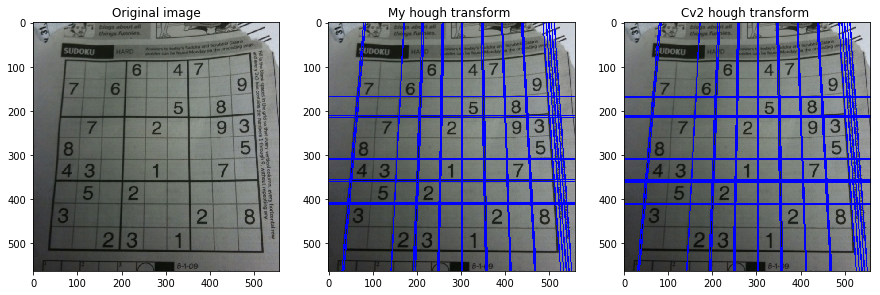

In [114]:
img = cv2.imread('sudoku.png')
my_hough=img.copy()
cv2_hough=img.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150)
my_lines=my_hough_lines(edges,200,1)
for rho,theta in my_lines:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(my_hough,(x1,y1),(x2,y2),(255,0,0),2)
cv2.imwrite('houghlines.jpg',my_hough)

cv2_houghlines=cv2.HoughLines(edges,1,pi/180,200)
for line in cv2_houghlines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(cv2_hough,(x1,y1),(x2,y2),(255,0,0),2)
cv2.imwrite('cv2_houghlines.jpg',cv2_hough)

show_results(img,my_hough,cv2_hough)

2.1 Hough circles implementation

In [83]:
def my_hough_circles(image,minR,maxR,no_votes):
    max_y, max_x = image.shape
    theta_vec = np.deg2rad(np.arange(0.0, 360.0,1))
    H = np.zeros((max_x+1,max_y+1, maxR-minR+1),dtype=np.uint64)
    y_index, x_index = np.nonzero(image)
    theta_vec_cos = np.cos(theta_vec)
    theta_vec_sin = np.sin(theta_vec)
    for r in range(minR,maxR+1):
        for i in range(len(x_index)):
            x = x_index[i]
            y = y_index[i] 
            for theta_index in range(len(theta_vec)):
                 a = round(x-r *theta_vec_cos[theta_index])
                 b = round(y-r *theta_vec_sin[theta_index])
                 if a >= 0 and a < max_x and b >= 0 and b < max_y:
                    H[int(a),int(b),(r-minR)]+=1
                    
    circles = []
    h_max = H > no_votes
    a_index_max,b_index_max,r_index_max = np.nonzero(h_max)
    print()
    for j in range(len(a_index_max)):
        b = b_index_max[j]
        a = a_index_max[j]
        r = r_index_max[j]+minR
        circles.append((a,b,r))
    return circles


2.2 Comparing results

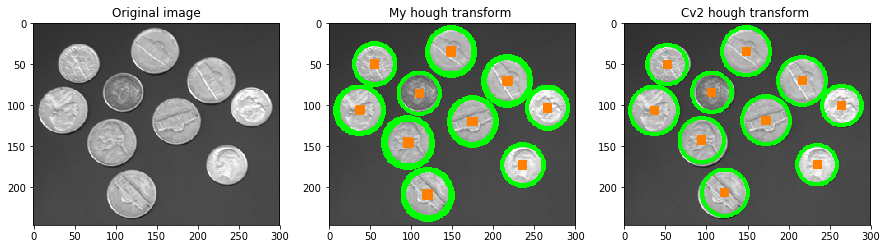

In [107]:
in_img=cv2.imread('coins.png')
my_hough=in_img.copy()
cv2_hough=in_img.copy()
gray = cv2.cvtColor(in_img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150)
my_circles = my_hough_circles(edges,25,30,175)
if my_circles is not None:
    for x,y,r in my_circles:
        # print(x,y,r)
        cv2.circle(my_hough, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(my_hough, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
    cv2.imwrite('myhoughcircles.jpg',my_hough)

cv_houghcircles = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,1,10,param1=50,param2=30,
                                   minRadius=10,maxRadius=30)
if cv_houghcircles is not None:
    cv_houghcircles = np.round(cv_houghcircles[0, :]).astype("int")
    for (x,y,r) in cv_houghcircles:
        cv2.circle(cv2_hough, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(cv2_hough, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
    cv2.imwrite('cv2_houghcircles.jpg',cv2_hough)

show_results(in_img,my_hough,cv2_hough)